
<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Beste Cartpole Agents</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Isa Dijkstra</td>
                <td style="border: 0;">IsaD01</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="photo/image.png" alt=" photo needs to be added" style="width: 1000px; height: auto;">
</div>

- Docent: Vikram Radhakrishnan
- Datum: 09-05-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Inhoudsopgave </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: Het project</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 2: Packages en functies inladen</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 3: De environment</a></li>
    <li style="text-align: center;"><a href="#4.0">Chapter 4: Trainen van de agents</a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 5: Resultaten van het trainen</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 6: Bronnenlijst</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: Het project </strong></h2>

</ul>

**CartPole in de Gymnasium-omgeving**

- Omgeving: Je gebruikt de CartPole-omgeving zoals beschikbaar in Gymnasium. In deze omgeving moet een kar (cart) zodanig worden aangestuurd dat een daaraan vastzittende staaf (pole) in verticale positie blijft.
- Uitdaging: De dynamica van de omgeving is continu en stochastisch, waardoor het balanceren van de pole door sequentiële beslissingen (acties) een interessante uitdaging vormt.

**Probleemanalyse**

Reinforcement learning is bijzonder geschikt voor dit type probleem, omdat:
- Trial-and-error leren: RL leert het beleid door interactie met de omgeving, waarbij de agent beloningen ontvangt voor acties die leiden tot langer in balans blijven van de pole.
- Sequential Decision Making: Het probleem is sequentieel van aard, waarbij elke keuze invloed heeft op de toekomstige staat van de omgeving. RL is hier beter toepasbaar dan bijvoorbeeld supervised learning, waarin de “juiste” actie vooraf gelabeld moet worden.
- Modelvrij: In tegenstelling tot niet-AI-oplossingen waarbij vaak modellen of regels moeten worden geprogrammeerd die niet alle dynamieken volledig kunnen vangen, leert een RL-agent de optimale strategie door zelf de regels van de omgeving te ontdekken.

- Vergelijking met andere methoden:
    - Supervised Learning: Vereist uitgebreide data met correcte labels en is minder geschikt voor real-time beslissingsprocessen.
    - Niet AI-oplossingen: Zelf geschreven heuristieken kunnen eenvoudig over-simplificeren en missen adaptiviteit. RL-algoritmes passen zich voortdurend aan op basis van de ontvangen beloningen, wat leidt tot robuustere prestaties in dynamische omgevingen.

**Probleemdefinitie en doelstelling**

- Probleemstelling:
“Ontwikkel een agent die in staat is de CartPole-omgeving zo lang mogelijk te balanceren door het kiezen van de optimale acties op basis van de huidige staat van het systeem.”

- Doelstelling:
	1.	Ontwikkelen van een baseline: Begin met een eenvoudige, niet-geoptimaliseerde strategie (zoals een random policy) om als referentie te dienen.
	2.	Implementatie van een RL-algoritme: Gebruik bijvoorbeeld Q-learning (of Sarsa) als RL-algoritme, waarbij je zoveel mogelijk zelf de logica implementeert zonder te vertrouwen op kant-en-klare RL-packages.
	3.	Hyperparameter exploratie: Experimenteer met parameters zoals de learning rate, discount factor en exploration-exploitation parameter (epsilon) om de prestaties van je agent te optimaliseren.
	4.	Evaluatie en validatie: Vergelijk de prestaties van je RL-agent met de baseline en visualiseer belangrijke indicatoren (zoals reward curves).

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Packages en functies inladen</strong></h2>

</ul>

In [1]:
import os
import sys
import base64
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import HTML
from gymnasium.wrappers import RecordVideo

In [2]:
os.chdir("..")

In [3]:
from src.utils import plot_rewards
from src.agent import QLearningAgent
from src.environment import CartPoleEnvironment

In [17]:
def record_episode(agent, env, video_folder='video', episode=5):
    """
    Voer een enkele episode uit en neem een video op van de agent.
    
    Parameters:
      - agent: de getrainde agent (bijvoorbeeld jouw QLearningAgent)
      - env: de niet-opgenomen omgeving (Gymnasium environment)
      - video_folder: map waarin de video wordt opgeslagen
      - episode: een identificatienummer voor de episode (optioneel)
    
    Returns:
      - video_path: pad naar de opgenomen video
    """
    if not os.path.exists(video_folder):
        os.makedirs(video_folder)
    
    video_env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)
    
    state, _ = video_env.reset()
    state_disc = agent.create_state(state)
    done = False

    while not done:
        action = agent.choose_action(state_disc)
        next_state, reward, done, truncated, info = video_env.step(action)
        state_disc = agent.create_state(next_state)

        if done:
            break

    video_env.close()

    video_files = [f for f in os.listdir(video_folder) if f.endswith(".mp4")]
    video_files.sort() 
    if video_files:
        video_path = os.path.join(video_folder, video_files[-1])
    else:
        video_path = None
    
    return video_path

In [5]:
def display_video(video_path):
    """
    Laat een video inline zien in een Jupyter Notebook.
    
    Parameters:
      - video_path: het pad naar het videobestand
    """
    if video_path is None or not os.path.exists(video_path):
        print("Geen video gevonden.")
        return
      
    video_file = open(video_path, "rb").read()
    video_encoded = base64.b64encode(video_file).decode('ascii')
    
    html = f"""
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
    </video>
    """
    return HTML(html)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: De environment </strong></h2>
</div>

Opstarten environment

In [6]:
env_wrapper = CartPoleEnvironment('CartPole-v1')
env = env_wrapper.env

agent = QLearningAgent(env)

Bekijken van hyperparameters

In [7]:
print(f"Initial epsilon: {agent.epsilon}")
print(f"Learning rate (alpha): {agent.alpha}")
print(f"Discount factor (gamma): {agent.gamma}")

Initial epsilon: 1.0
Learning rate (alpha): 0.1
Discount factor (gamma): 0.7


---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Trainen van agents </strong></h2>
</div>

In [8]:
num_episodes = 2000
reward_list = []

for episode in range(num_episodes):
    state, _ = env_wrapper.reset()
    state_disc = agent.create_state(state)


    total_reward = 0
    done = False
    
    while not done:
        action = agent.choose_action(state_disc)
        next_state, reward, done, truncated, info = env_wrapper.step(action)
        next_state_disc = agent.create_state(next_state)

        agent.create_Q(state_disc, [0, 1])  # CartPole heeft acties 0 en 1
        agent.create_Q(next_state_disc, [0, 1])
        agent.learn(next_state_disc, action, reward, state_disc, action)

        state_disc = next_state_disc
        total_reward += reward
        
        if done:
            break
    
    agent.decay_epsilon()
    reward_list.append(total_reward)
    print(f"Episode {episode+1}/{num_episodes}: Reward {total_reward}")

env_wrapper.close()

Episode 1/2000: Reward 27.0
Episode 2/2000: Reward 17.0
Episode 3/2000: Reward 9.0
Episode 4/2000: Reward 11.0
Episode 5/2000: Reward 25.0
Episode 6/2000: Reward 16.0
Episode 7/2000: Reward 13.0
Episode 8/2000: Reward 22.0
Episode 9/2000: Reward 12.0
Episode 10/2000: Reward 39.0
Episode 11/2000: Reward 20.0
Episode 12/2000: Reward 29.0
Episode 13/2000: Reward 26.0
Episode 14/2000: Reward 33.0
Episode 15/2000: Reward 15.0
Episode 16/2000: Reward 13.0
Episode 17/2000: Reward 37.0
Episode 18/2000: Reward 14.0
Episode 19/2000: Reward 21.0
Episode 20/2000: Reward 33.0
Episode 21/2000: Reward 12.0
Episode 22/2000: Reward 22.0
Episode 23/2000: Reward 37.0
Episode 24/2000: Reward 18.0
Episode 25/2000: Reward 28.0
Episode 26/2000: Reward 10.0
Episode 27/2000: Reward 17.0
Episode 28/2000: Reward 16.0
Episode 29/2000: Reward 39.0
Episode 30/2000: Reward 31.0
Episode 31/2000: Reward 61.0
Episode 32/2000: Reward 20.0
Episode 33/2000: Reward 19.0
Episode 34/2000: Reward 13.0
Episode 35/2000: Reward 

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 5: Resultaten van het trainen </strong></h2>
</div>

Resultaten bekijken

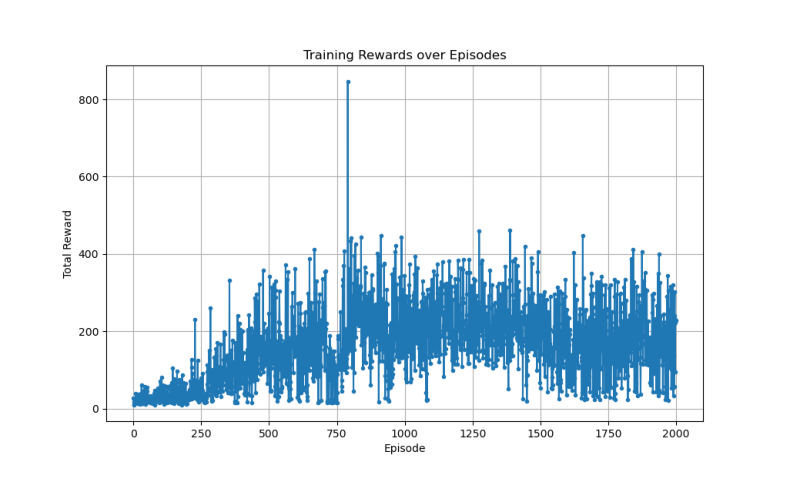

In [9]:
plot_rewards(reward_list, title="Training Rewards over Episodes", filename="train_rewards.png")

img = plt.imread("train_rewards.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Bekijken wat er gebeurd

In [24]:


# Neem een video op van de agent die de omgeving verkent
video_path = record_episode(agent, env_wrapper.env, video_folder='video')

# Toon de video in het notebook
display_video(video_path)

### Resultaten en Analyse

Bovenstaande grafiek toont de totale rewards per episode. Deze grafiek geeft een indicatie van hoe snel de agent leert de pole in balans te houden, en laat tevens de variabiliteit tussen episodes zien.

#### Mogelijke Observaties
- Een stijgende trend in de reward-curve duidt op leerprogressie.
- Grote schommelingen kunnen wijzen op een te hoge epsilon-waarde (te veel exploratie) of andere onstabiele hyperparameters.

Door te experimenteren met hyperparameters zoals `alpha`, `gamma` en `epsilon_decay` kan de prestatie van de agent verder worden geoptimaliseerd.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Bronnenlijst </strong></h2>
</div>